# Project: Analyzing the Impact of OPEC Membership on Crude Oil Production and Economic Output (1985-2022)

In [45]:
# pip install
!pip install pandas numpy 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [46]:
# library imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Oil Production

In [47]:
# importing oil production dataframe
world_oil_production_df = pd.read_csv("data/opec_upstream/world_oil_production.csv", index_col="Index")
world_oil_production_df.replace('na', np.nan, inplace=True)
world_oil_production_df = world_oil_production_df.astype(float)

# fixing import errors
replace = {'IR Iran': 'I.R.Iran', 'Saudi Arabia1': 'Saudi Arabia', 'Kuwait1': 'Kuwait', 'Syrian Arab Rep.': 'Syria'}
world_oil_production_df = world_oil_production_df.rename(index=replace)

# importing oil demand dataframe
world_oil_demand_df = pd.read_csv("data/opec_downstream/world_oil_demand.csv", index_col="Index")
world_oil_demand_df.replace('na', np.nan, inplace=True)
world_oil_demand_df = world_oil_demand_df.astype(float)

# merging dataframes
world_oil_deficit_df = world_oil_demand_df.merge(world_oil_production_df, left_index=True, right_index=True, how='inner')

# computing deficit
for year in range(1960, 2023):
    year_x, year_y = f"{year}_x", f"{year}_y"
    world_oil_deficit_df[year] = world_oil_deficit_df[year_x] - world_oil_deficit_df[year_y]
    world_oil_deficit_df = world_oil_deficit_df.drop(columns=[year_x, year_y])
    
# transposing dataframes
world_oil_production_df = world_oil_production_df.transpose()
world_oil_demand_df = world_oil_demand_df.transpose()
world_oil_deficit_df = world_oil_deficit_df.transpose()

In [48]:
def line_plot_function(cols, title=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

    world_oil_production_df[cols].plot(kind='line', legend=False, ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Oil (1000 b/d)')
    ax1.set_title('Production')

    world_oil_demand_df[cols].plot(kind='line', legend=False, ax=ax2)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Oil (1000 b/d)')
    ax2.set_title('Demand')

    world_oil_deficit_df[cols].plot(kind='line', legend=False, ax=ax3)
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Oil (1000 b/d)')
    ax3.set_title('Deficit')
    ax3.axhline(y=0, color='black', linestyle='--')

    lines, labels = ax1.get_legend_handles_labels()

    fig.legend(lines, labels, loc='center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    fig.suptitle(title, fontsize=20, y=1.02)
    plt.tight_layout()

In [49]:
def box_plot_function(cols, title=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    
    world_oil_production_df[cols].transpose().boxplot(ax=ax1, showfliers=False)
    ax1.set_title('Production')
    ax1.set_ylabel('Oil (1000 b/d)')
    ax1.grid(False, axis='x')
    
    world_oil_demand_df[cols].transpose().boxplot(ax=ax2, showfliers=False)
    ax2.set_title('Demand')
    ax2.set_ylabel('Oil (1000 b/d)')
    ax2.grid(False, axis='x')
    
    world_oil_deficit_df[cols].transpose().boxplot(ax=ax3, showfliers=False)
    ax3.set_title('Deficit')
    ax3.set_ylabel('Oil (1000 b/d)')
    ax3.axhline(y=0, color='red', linestyle='--')
    ax3.grid(False, axis='x')

    fig.suptitle(title, fontsize=20, y=1.02)
    plt.tight_layout()

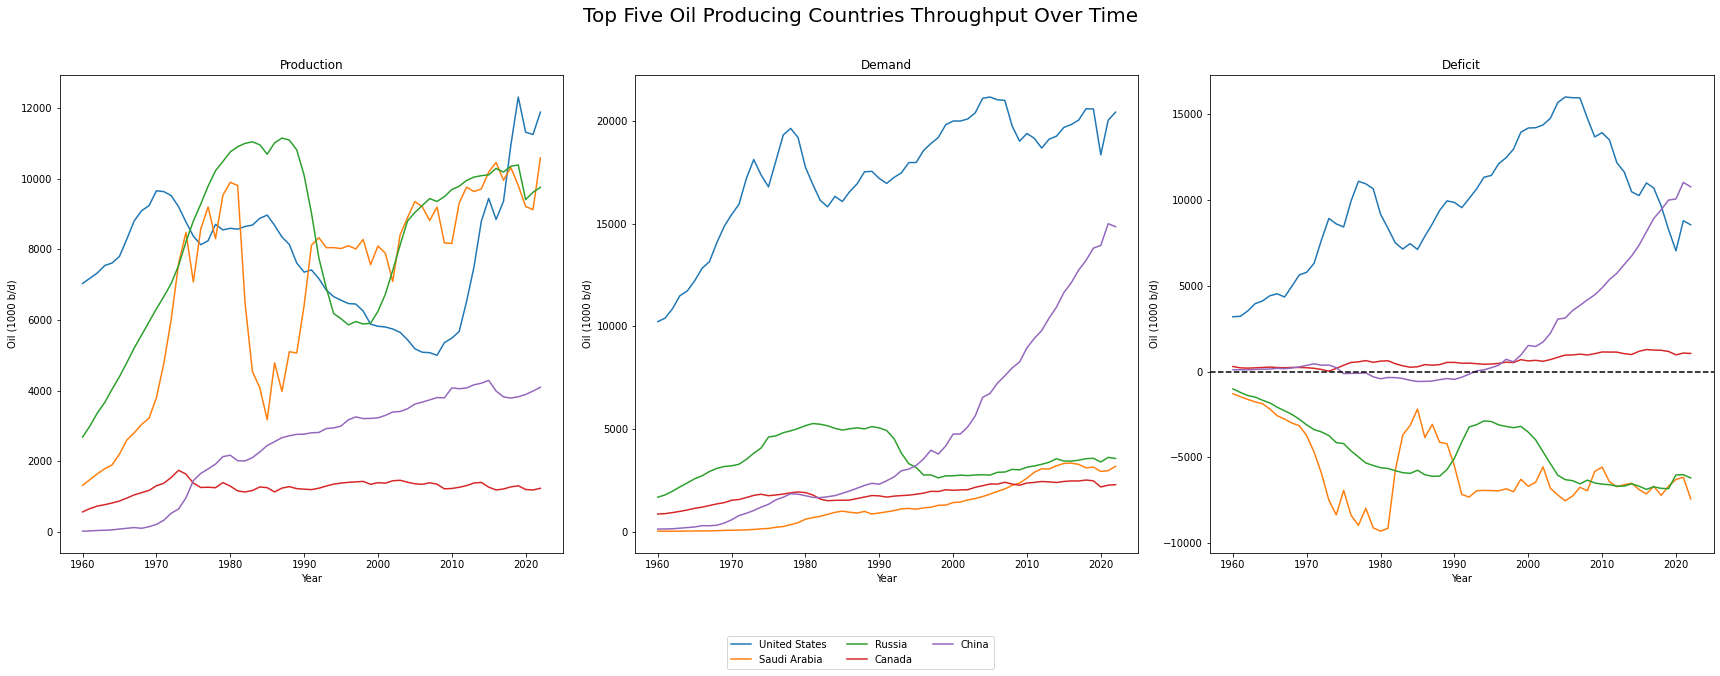

In [50]:
top_5_producers = ['United States', 'Saudi Arabia', 'Russia', 'Canada', 'China']
line_plot_function(top_5_producers, title="Top Five Oil Producing Countries Throughput Over Time")

/var/folders/rq/9zvkr67d2mx07n6md37__xcr0000gn/T/ipykernel_83325/527382754.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  opec_countries = pd.read_csv('data/countries/opec.csv', header=None, squeeze=True).to_list()


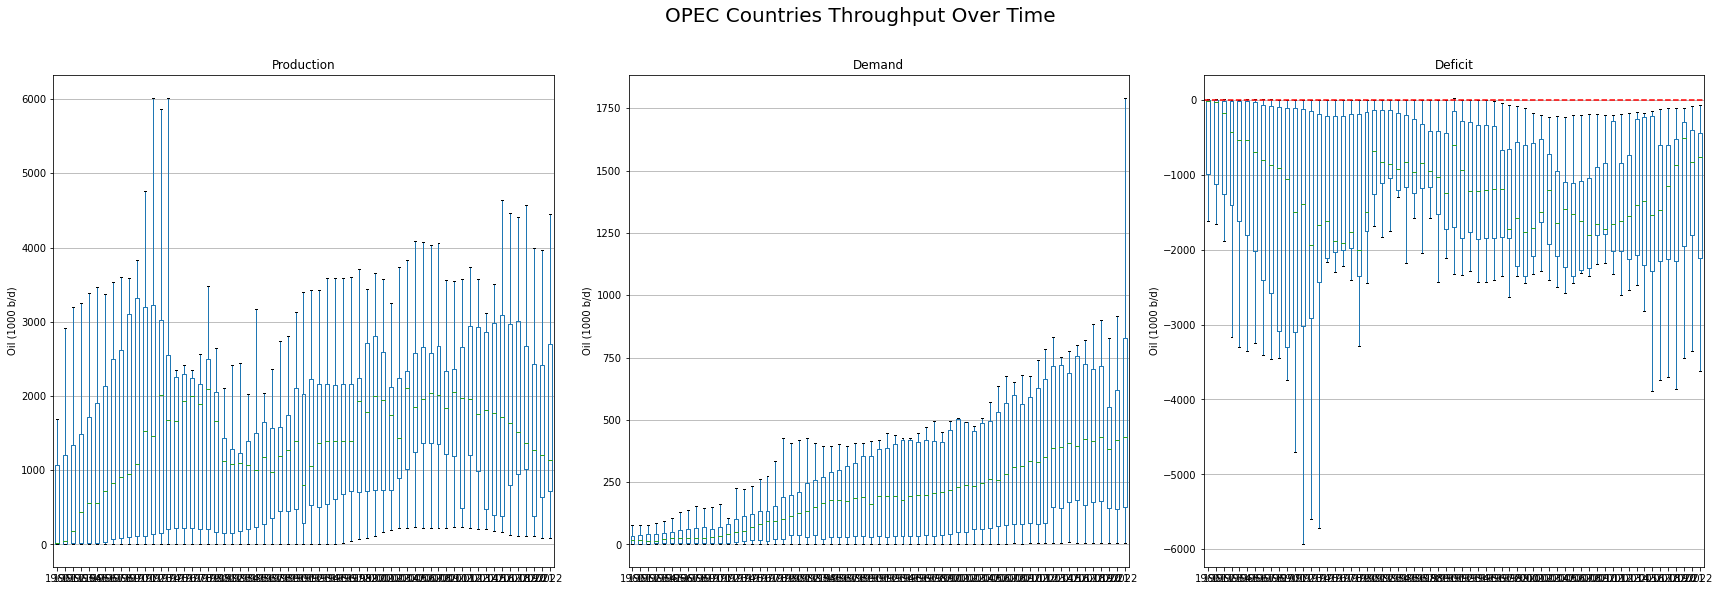

In [51]:
opec_countries = pd.read_csv('data/countries/opec.csv', header=None, squeeze=True).to_list()
box_plot_function(opec_countries, title="OPEC Countries Throughput Over Time")

/var/folders/rq/9zvkr67d2mx07n6md37__xcr0000gn/T/ipykernel_83325/3605015856.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  oecd_countries = pd.read_csv('data/countries/oecd.csv', header=None, squeeze=True)


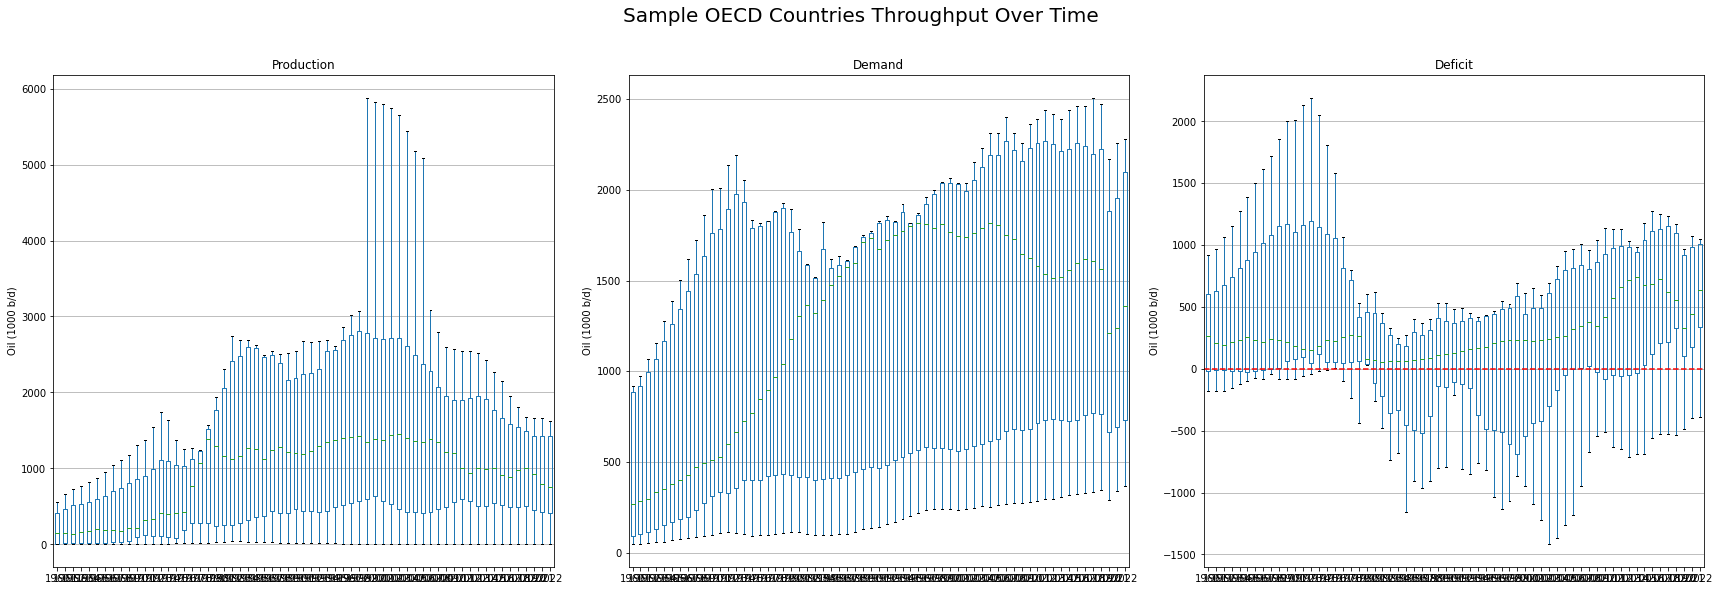

In [52]:
# unit: millions of barrels
oecd_countries = pd.read_csv('data/countries/oecd.csv', header=None, squeeze=True)
oecd_countries = oecd_countries[oecd_countries.isin(world_oil_deficit_df.columns)]
box_plot_function(oecd_countries, "Sample OECD Countries Throughput Over Time")

In [ ]:
non_opec_countries = list(set(world_oil_deficit_df.columns) - set(opec_countries))

### Oil Reserves

In [ ]:
# importing oil production dataframe
world_oil_production_df = pd.read_csv("data/opec_upstream/world_oil_production.csv", index_col="Index")
world_oil_production_df.replace('na', np.nan, inplace=True)
world_oil_production_df = world_oil_production_df.astype(float)

world_oil_production_df

In [54]:
# converting python notebook to html
!jupyter nbconvert --to html milestone_2.ipynb --output index

[NbConvertApp] Converting notebook milestone_2.ipynb to html
[NbConvertApp] Writing 915122 bytes to index.html
